In [2]:
!nvidia-smi

Sat May 20 20:52:22 2023       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 525.85.12    Driver Version: 525.85.12    CUDA Version: 12.0     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla T4            Off  | 00000000:00:04.0 Off |                    0 |
| N/A   47C    P8    10W /  70W |      0MiB / 15360MiB |      0%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

In [12]:
!pip install -U openmim
!mim install mmengine
!mim install "mmcv>=2.0.0"

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 51.3/51.3 kB 6.3 MB/s eta 0:00:00
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in links: https://download.openmmlab.com/mmcv/dist/cu118/torch2.0.0/index.html
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 372.1/372.1 kB 17.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 200.9/200.9 kB 20.6 MB/s eta 0:00:00
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in links: https://download.openmmlab.com/mmcv/dist/cu118/torch2.0.0/index.html
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 74.4/74.4 MB 10.3 MB/s eta 0:00:00


In [13]:
! mim install mmdet


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in links: https://download.openmmlab.com/mmcv/dist/cu118/torch2.0.0/index.html
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.7/1.7 MB 46.8 MB/s eta 0:00:00


In [15]:
!mim download mmdet --config mask-rcnn_r50-caffe_fpn_ms-poly-2x_coco --dest .

processing mask-rcnn_r50-caffe_fpn_ms-poly-2x_coco...
downloading ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 169.6/169.6 MiB 47.0 MB/s eta 0:00:00
Successfully downloaded mask_rcnn_r50_caffe_fpn_mstrain-poly_2x_coco_bbox_mAP-0.403__segm_mAP-0.365_20200504_231822-a75c98ce.pth to /content
Successfully dumped mask-rcnn_r50-caffe_fpn_ms-poly-2x_coco.py to /content


In [17]:
!wget -nc https://storage.googleapis.com/pipat-public-temp-storage/bicyclecard.zip
!unzip bicyclecard.zip

File ‘bicyclecard.zip’ already there; not retrieving.

Archive:  bicyclecard.zip
   creating: bicyclecard/
   creating: bicyclecard/images/
  inflating: bicyclecard/images/IMG_20230520_181747585.jpg  
  inflating: bicyclecard/images/IMG_20230520_185539556.jpg  
  inflating: bicyclecard/images/IMG_20230520_190114760.jpg  
  inflating: bicyclecard/images/IMG_20230520_181300821.jpg  
  inflating: bicyclecard/images/IMG_20230520_190510297.jpg  
  inflating: bicyclecard/images/IMG_20230520_185353322.jpg  
  inflating: bicyclecard/images/IMG_20230520_190411688.jpg  
  inflating: bicyclecard/images/IMG_20230520_185914631.jpg  
  inflating: bicyclecard/images/IMG_20230519_144539965.jpg  
  inflating: bicyclecard/images/IMG_20230520_185238922.jpg  
  inflating: bicyclecard/images/IMG_20230520_190027057.jpg  
  inflating: bicyclecard/images/IMG_20230520_185700449.jpg  
  inflating: bicyclecard/bicyclecard.json  


In [45]:
cfg = """
_base_ = './mask-rcnn_r50-caffe_fpn_ms-poly-2x_coco.py'

dataset_type = 'CocoDataset'
classes = ('card',)
data_root='./bicyclecard'

train_dataloader = dict(
    batch_size=2,
    num_workers=2,
    dataset=dict(
        type=dataset_type,
        # explicitly add your class names to the field `metainfo`
        metainfo=dict(classes=classes),
        data_root=data_root,
        ann_file='bicyclecard.json',
        data_prefix=dict(img='images')
        )
    )

val_dataloader = dict(
    batch_size=1,
    num_workers=2,
    dataset=dict(
        type=dataset_type,
        test_mode=True,
        # explicitly add your class names to the field `metainfo`
        metainfo=dict(classes=classes),
        data_root=data_root,
        ann_file='bicyclecard.json',
        data_prefix=dict(img='images')
        )
    )

test_dataloader = dict(
    batch_size=1,
    num_workers=2,
    dataset=dict(
        type=dataset_type,
        test_mode=True,
        # explicitly add your class names to the field `metainfo`
        metainfo=dict(classes=classes),
        data_root=data_root,
        ann_file='bicyclecard.json',
        data_prefix=dict(img='images')
        )
    )

# 2. model settings

# explicitly over-write all the `num_classes` field from default 80 to 5.
model = dict(
    roi_head=dict(
        bbox_head=dict(
          type='Shared2FCBBoxHead',
          num_classes=1,
        ),
    # explicitly over-write all the `num_classes` field from default 80 to 5.
    mask_head=dict(num_classes=1)))

val_evaluator = dict(
    ann_file='./bicyclecard/bicyclecard.json',
)
test_evaluator = dict(
    ann_file='./bicyclecard/bicyclecard.json',
)

load_from = "/content/mask_rcnn_r50_caffe_fpn_mstrain-poly_2x_coco_bbox_mAP-0.403__segm_mAP-0.365_20200504_231822-a75c98ce.pth"

"""

In [46]:
with open("bicycle_config.py", "w") as f:
  f.write(cfg)

In [34]:
!git clone https://github.com/open-mmlab/mmdetection.git

fatal: destination path 'mmdetection' already exists and is not an empty directory.


In [47]:
!python mmdetection/tools/train.py bicycle_config.py

05/20 21:46:05 - mmengine - INFO - 
------------------------------------------------------------
System environment:
    sys.platform: linux
    Python: 3.10.11 (main, Apr  5 2023, 14:15:10) [GCC 9.4.0]
    CUDA available: True
    numpy_random_seed: 1660056071
    GPU 0: Tesla T4
    CUDA_HOME: /usr/local/cuda
    NVCC: Cuda compilation tools, release 11.8, V11.8.89
    GCC: x86_64-linux-gnu-gcc (Ubuntu 9.4.0-1ubuntu1~20.04.1) 9.4.0
    PyTorch: 2.0.1+cu118
    PyTorch compiling details: PyTorch built with:
  - GCC 9.3
  - C++ Version: 201703
  - Intel(R) oneAPI Math Kernel Library Version 2022.2-Product Build 20220804 for Intel(R) 64 architecture applications
  - Intel(R) MKL-DNN v2.7.3 (Git Hash 6dbeffbae1f23cbbeae17adb7b5b13f1f37c080e)
  - OpenMP 201511 (a.k.a. OpenMP 4.5)
  - LAPACK is enabled (usually provided by MKL)
  - NNPACK is enabled
  - CPU capability usage: AVX2
  - CUDA Runtime 11.8
  - NVCC architecture flags: -gencode;arch=compute_37,code=sm_37;-gencode;arch=compute_50

In [52]:
from mmdet.apis import init_detector, inference_detector
import mmcv

# Specify the path to model config and checkpoint file
config_file = './bicycle_config.py'
checkpoint_file = './work_dirs/bicycle_config/epoch_24.pth'

# build the model from a config file and a checkpoint file
model = init_detector(config_file, checkpoint_file, device='cuda:0')

# test a single image and show the results
img = '/content/bicyclecard/images/IMG_20230519_144539965.jpg'  # or img = mmcv.imread(img), which will only load it once
result = inference_detector(model, img)


Loads checkpoint by local backend from path: ./work_dirs/bicycle_config/epoch_24.pth


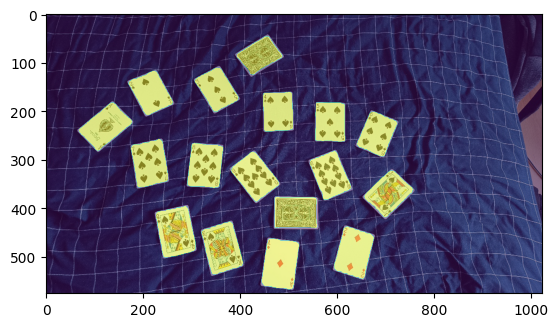

In [68]:
import matplotlib.pyplot as plt
import numpy as np

im = plt.imread(img)

plt.imshow(im)

out = np.zeros(im.shape[:-1])*0.0
for t in result.pred_instances.masks:
  out += t.cpu().numpy() * 0.1

plt.imshow(out, alpha=0.5)

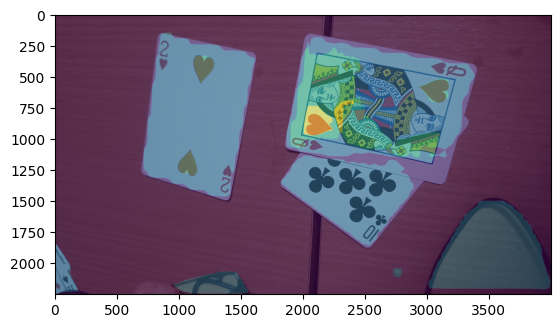

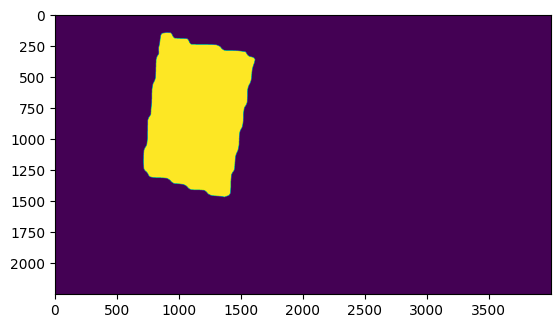

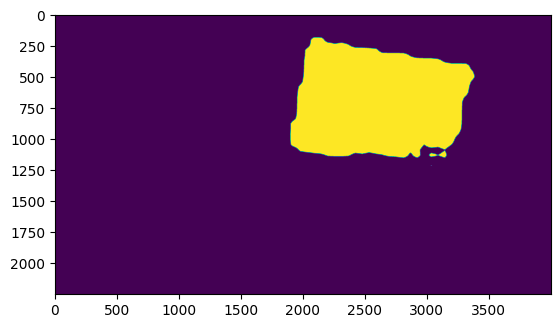

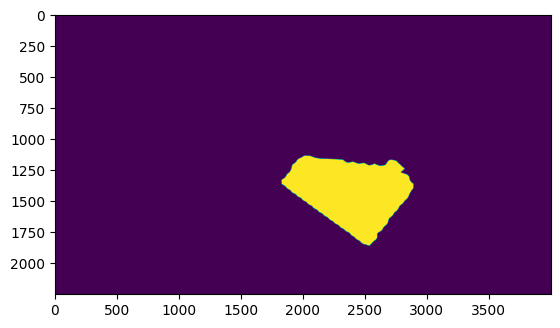

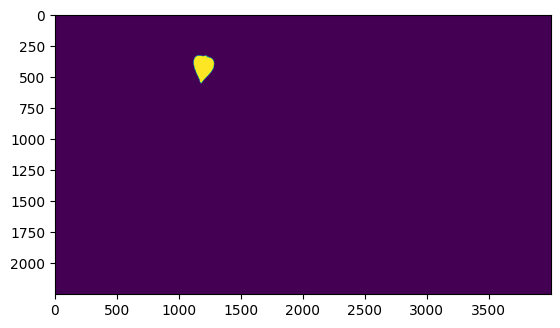

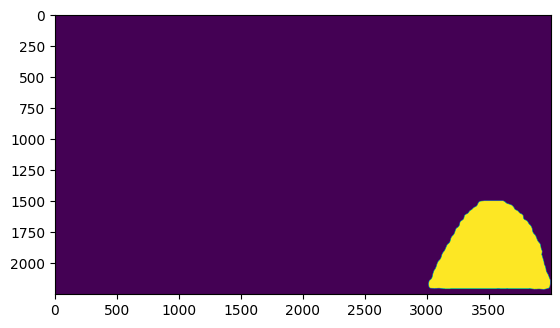

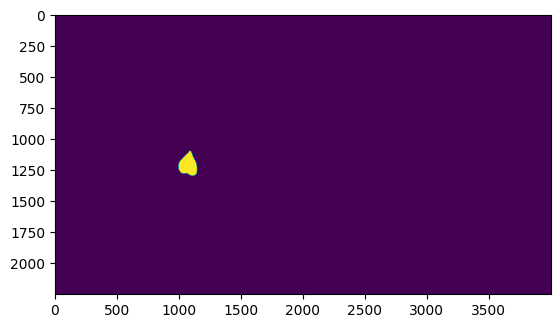

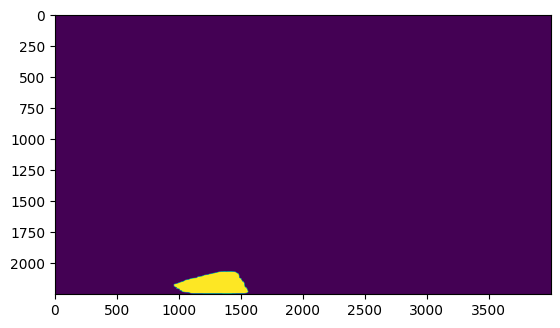

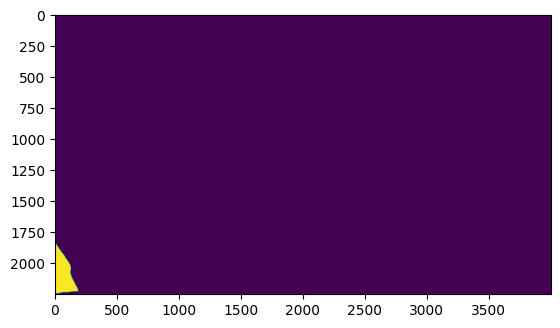

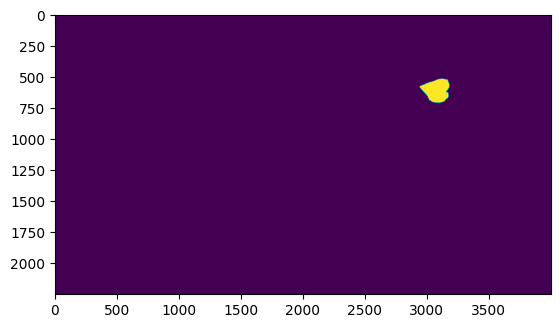

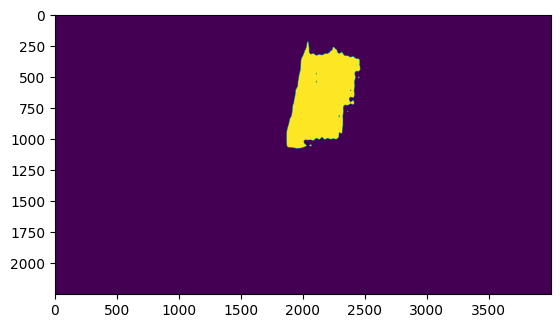

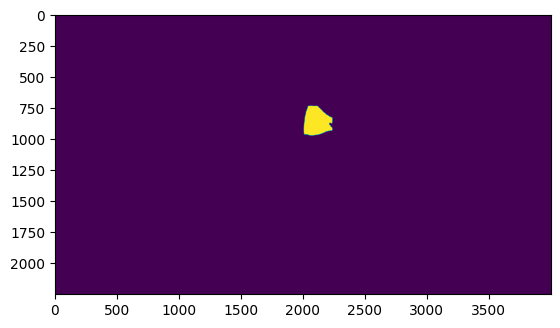

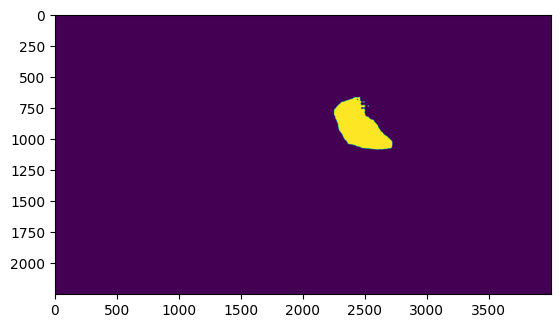

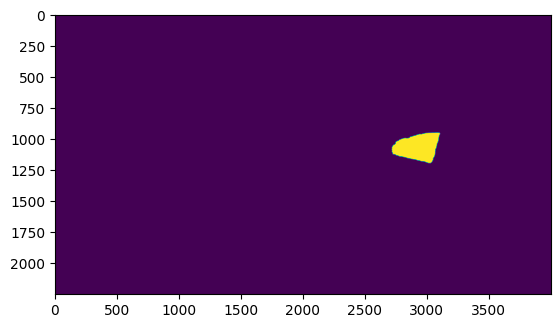

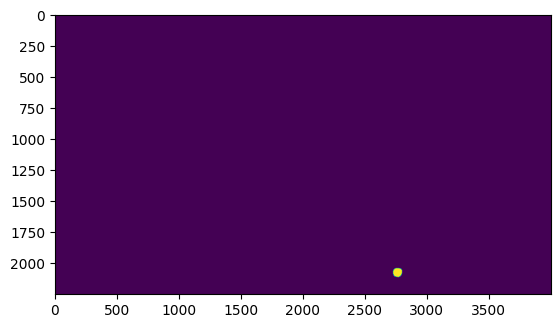

In [73]:
img = './testsmp1.jpg'  # or img = mmcv.imread(img), which will only load it once
result = inference_detector(model, img)
im = plt.imread(img)


plt.imshow(im)

out = np.zeros(im.shape[:-1])*0.0
for t in result.pred_instances.masks:
  out += t.cpu().numpy() * 0.1

plt.imshow(out, alpha=0.5)

for t in result.pred_instances.masks:
  plt.figure()
  plt.imshow(t.cpu().numpy())


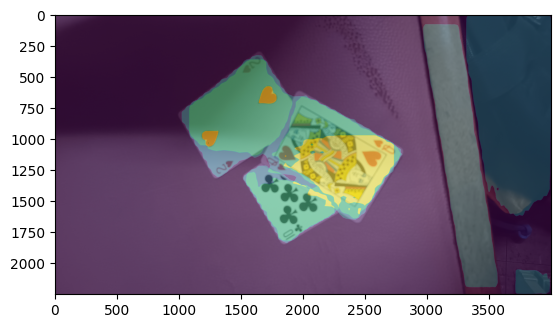

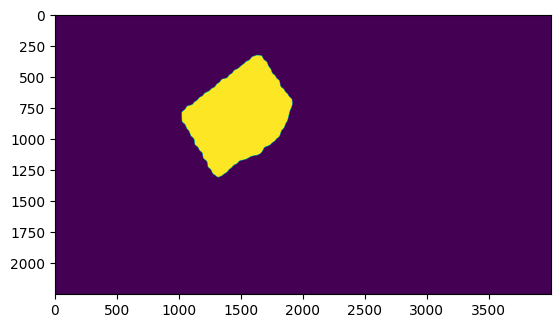

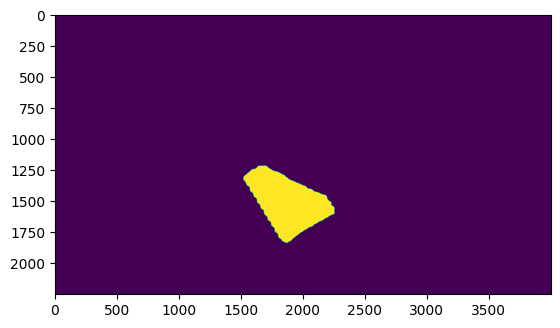

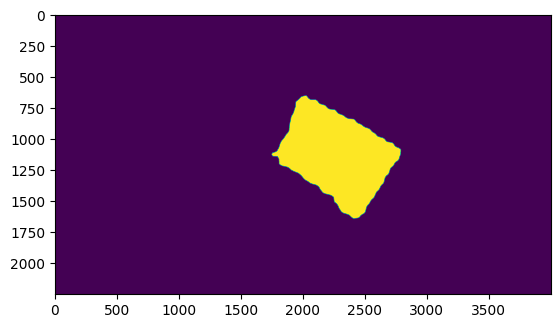

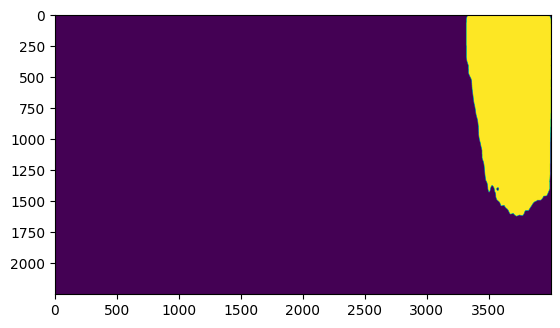

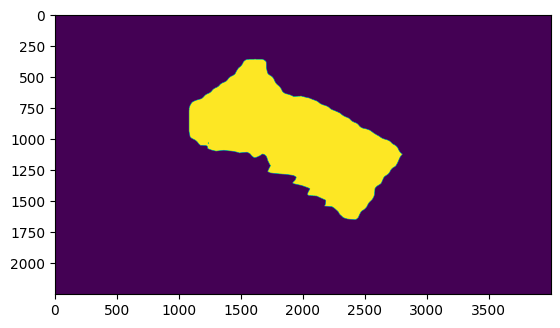

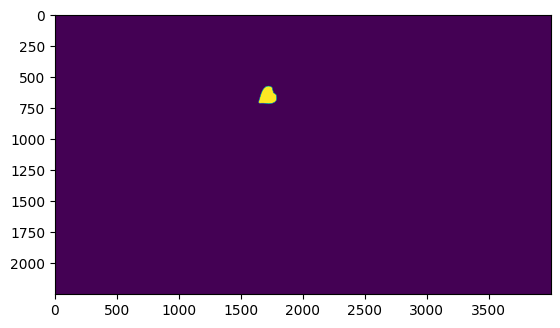

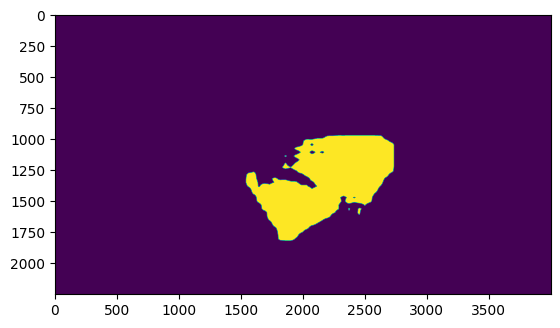

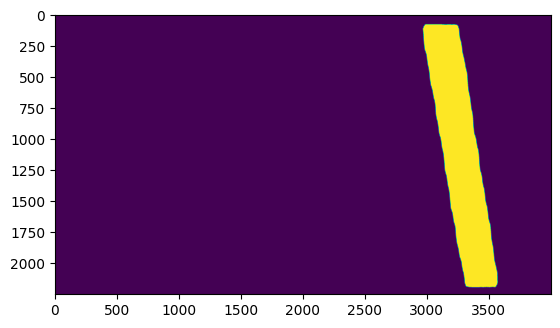

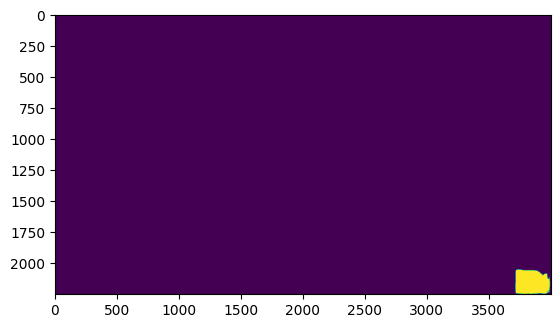

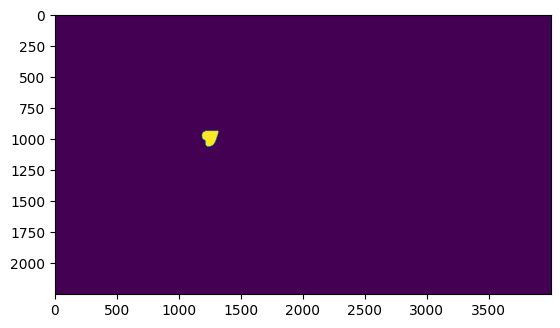

In [74]:
img = './testsmp2.jpg'  # or img = mmcv.imread(img), which will only load it once
result = inference_detector(model, img)
im = plt.imread(img)


plt.imshow(im)

out = np.zeros(im.shape[:-1])*0.0
for t in result.pred_instances.masks:
  out += t.cpu().numpy() * 0.1

plt.imshow(out, alpha=0.5)

for t in result.pred_instances.masks:
  plt.figure()
  plt.imshow(t.cpu().numpy())
